# Pneumonia Detection using Convolutional Neural Networks

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelEncoder

from PIL import Image

import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline

NORMAL


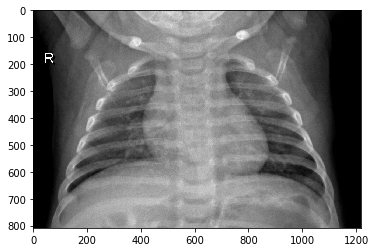

In [3]:
img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img('C:/Users/ektas/chest_xray/train/NORMAL/' + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

PNEUMONIA


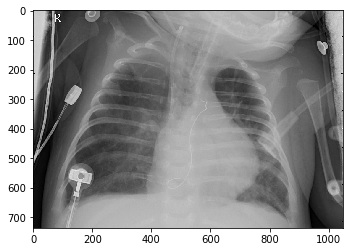

In [4]:
img_name = 'person63_bacteria_306.jpeg'
img_pneumonia = load_img('C:/Users/ektas/chest_xray/train/PNEUMONIA/' + img_name)

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

In [5]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'C:/Users/ektas/chest_xray/train'
validation_data_dir = 'C:/Users/ektas/chest_xray/val'
test_data_dir = 'C:/Users/ektas/chest_xray/test'

nb_train_samples = 5217
nb_validation_samples = 17
epochs = 20
batch_size = 16

In [6]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [7]:
#Building model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.layers

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [11]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [12]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [13]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [14]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
326/326 [==============================] - 249s 764ms/step - loss: 0.4297 - acc: 0.8150 - val_loss: 0.9403 - val_acc: 0.6250
Epoch 2/20
326/326 [==============================] - 226s 694ms/step - loss: 0.2904 - acc: 0.8838 - val_loss: 0.4966 - val_acc: 0.7500
Epoch 3/20
326/326 [==============================] - 235s 720ms/step - loss: 0.2434 - acc: 0.9026 - val_loss: 0.9140 - val_acc: 0.6875
Epoch 4/20
326/326 [==============================] - 231s 708ms/step - loss: 0.2290 - acc: 0.9139 - val_loss: 0.6615 - val_acc: 0.8125
Epoch 5/20
326/326 [==============================] - 237s 726ms/step - loss: 0.2103 - acc: 0.9216 - val_loss: 0.8535 - val_acc: 0.6875
Epoch 6/20
326/326 [==============================] - 245s 750ms/step - loss: 0.2174 - acc: 0.9247 - val_loss: 0.7200 - val_acc: 0.6875
Epoch 7/20
326/326 [==============================] - 253s 777ms/step - loss: 0.2105 - acc: 0.9229 - val_loss: 0.6098 - val_acc: 0.7500


In [18]:
model.save_weights('first_try.h5')

In [16]:
# evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 83.97%
